In [ ]:
# import cudf
# %load_ext cudf.pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import os
from datetime import datetime
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)




In [ ]:
Active =pd.read_csv('/content/All_active_users_fy21-fy24_new9-24.csv')
Lapsed =pd.read_csv('/content/All_lapsed_users_fy21-fy24_new9-24.csv')

In [ ]:
Active.shape; Lapsed.shape

(129965, 46)

(78332, 46)

In [ ]:
Active.ContactId.nunique(); Lapsed.ContactId.nunique()

128307

77537

In [ ]:
Active.columns

Index(['ContactId', 'mvcms__activation_date__c', 'mvcms__expire_date__c',
       'rC_Giving__Primary_Membership_Status__c', 'AUDIENCE_TOUCHPOINTS',
       'LAST_INTERACTION_DATE', 'ACQUIRED_ON', 'donation_frequency',
       'TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024', 'TOTAL_AMOUNT_YTD', 'DBUSA_Income', 'DBUSA_Career',
       'Occupation_Individual_Description', 'ShippingCity', 'ShippingState',
       'ShippingCountry', 'rC_Bios__Age__c', 'rC_Bios__Gender__c',
       'NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN', 'OPTIN',
       'rC_Giving__Is_Sustainer__c', 'NEW_TO_FILE', 'Event_count',
       'HAS_ATTEND_AN_EVENT', 'ACQUIRED_CHANNEL', 'LastDonationDate',
       'GivingPortfolio_Indicator__c', 'Campaign_Channel__c',
       'Cnt_donation_date', 'Cnt_Pledges', 'Cnt_campaigns',
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_da

In [ ]:
print(f'Total Active Users are {Active.shape[0]}, Streaming: {Active[Active.Streaming_time > 0.0].shape[0]}')
print(f'Total Lapsed Users are {Lapsed.shape[0]}, Streaming: {Lapsed[Lapsed.Streaming_time > 0.0].shape[0]}')

Total Active Users are 129965, Streaming: 84131
Total Lapsed Users are 78332, Streaming: 27093


In [ ]:
Active.isnull().mean().sort_values()*100

,0
ContactId,0.00
Cnt_of_additional_giving,0.00
Campaign_Channel__c,0.00
LastDonationDate,0.00
ACQUIRED_CHANNEL,0.00
HAS_ATTEND_AN_EVENT,0.00
Event_count,0.00
NEW_TO_FILE,0.00
rC_Giving__Is_Sustainer__c,0.00
OPTIN,0.00


In [ ]:
Lapsed.loc[
    (Lapsed['TOTAL_AMOUNT_YTD'].notnull()),
    'rC_Giving__Primary_Membership_Status__c'
] = 'Active'

In [ ]:
comb_df = pd.concat([Active, Lapsed])

In [ ]:
comb_df.shape

(208297, 46)

In [ ]:
comb_df['No_donations_fy21_fy24'] = comb_df[['TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024']].count(axis=1)

In [ ]:
comb_df['Total_Amount']=comb_df[['TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024']].sum(axis=1)

In [ ]:
comb_df = comb_df.drop_duplicates(subset='ContactId', keep=False)
df = comb_df.copy()

In [ ]:
comb_df.shape

(203535, 48)

In [ ]:
comb_df.columns

Index(['ContactId', 'mvcms__activation_date__c', 'mvcms__expire_date__c',
       'rC_Giving__Primary_Membership_Status__c', 'AUDIENCE_TOUCHPOINTS',
       'LAST_INTERACTION_DATE', 'ACQUIRED_ON', 'donation_frequency',
       'TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024', 'TOTAL_AMOUNT_YTD', 'DBUSA_Income', 'DBUSA_Career',
       'Occupation_Individual_Description', 'ShippingCity', 'ShippingState',
       'ShippingCountry', 'rC_Bios__Age__c', 'rC_Bios__Gender__c',
       'NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN', 'OPTIN',
       'rC_Giving__Is_Sustainer__c', 'NEW_TO_FILE', 'Event_count',
       'HAS_ATTEND_AN_EVENT', 'ACQUIRED_CHANNEL', 'LastDonationDate',
       'GivingPortfolio_Indicator__c', 'Campaign_Channel__c',
       'Cnt_donation_date', 'Cnt_Pledges', 'Cnt_campaigns',
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_da

In [ ]:
comb_df['Cnt_donation_date'].isnull().sum()

1898

In [ ]:
# there are 454 rows in below mentioned columns as null, may be while extracting the data I missed, so I just replace null value with 1
x = ['Cnt_Pledges','Cnt_donation_date','Cnt_campaigns']
comb_df[x]= comb_df[x].fillna(1)

In [ ]:
comb_df['Cnt_donation_date'].isnull().sum()

0

In [ ]:
streaming_columns = ['No.of days watched', 'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_day', 'last_watched_day',
       'Avg_completion_rate_episode']
comb_df[streaming_columns]=comb_df[streaming_columns].fillna(0)

In [ ]:
comb_df['rC_Giving__Primary_Membership_Status__c'] = comb_df['rC_Giving__Primary_Membership_Status__c'].astype('category')

In [ ]:
comb_df.loc[
    (comb_df['TOTAL_AMOUNT_2024'].isnull()) & (comb_df['TOTAL_AMOUNT_YTD'].isnull()),
    'rC_Giving__Primary_Membership_Status__c'
] = 'Lapsed'


In [ ]:
status_counts = comb_df['rC_Giving__Primary_Membership_Status__c'].value_counts()
status_counts

,count
rC_Giving__Primary_Membership_Status__c,
Active,125234
Lapsed,78301


## Visualization

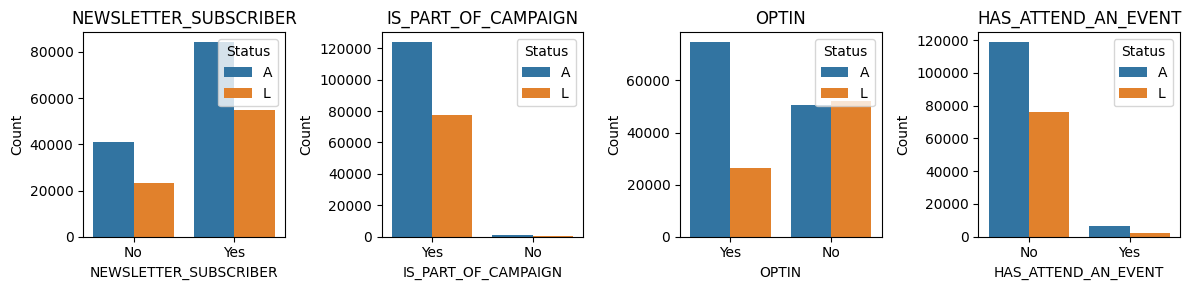

In [ ]:
categorical_features = ['NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN', 'OPTIN', 'HAS_ATTEND_AN_EVENT']

n_features = len(categorical_features)
fig, axes = plt.subplots(1, n_features, figsize=(n_features * 3, 3))
for ax, feature in zip(axes, categorical_features):
    sns.countplot(x=feature, hue='rC_Giving__Primary_Membership_Status__c', data=comb_df, ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.legend(title='Status', loc='upper right', labels=['A', 'L'])
plt.tight_layout()
plt.show();

In [ ]:
# I feel 'has_attend_an_event' people who attended are very less compared to no, so may be we can skip this column if we want.

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='Cnt_of_additional_giving'>

Text(0.5, 1.0, 'Boxplot of Cnt_of_additional_giving by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'Cnt_of_additional_giving')

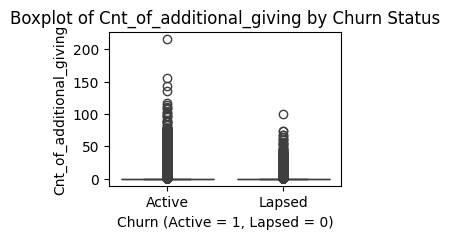

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='No.of days watched'>

Text(0.5, 1.0, 'Boxplot of No.of days watched by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'No.of days watched')

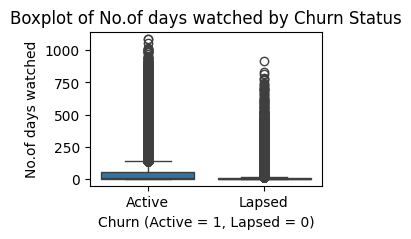

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='No_of_months_Watched'>

Text(0.5, 1.0, 'Boxplot of No_of_months_Watched by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'No_of_months_Watched')

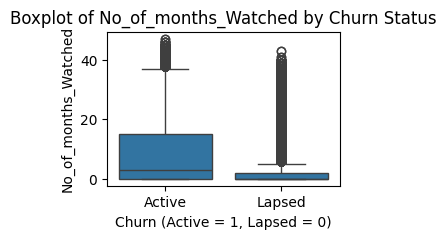

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='Show'>

Text(0.5, 1.0, 'Boxplot of Show by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'Show')

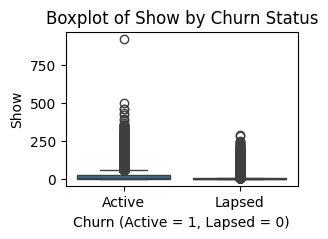

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='Episodes'>

Text(0.5, 1.0, 'Boxplot of Episodes by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'Episodes')

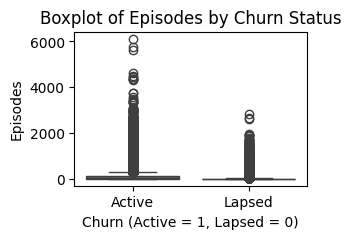

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='Streaming_time'>

Text(0.5, 1.0, 'Boxplot of Streaming_time by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'Streaming_time')

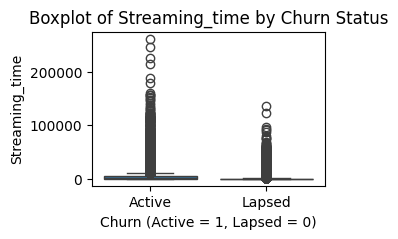

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='Avg_completion_rate_episode'>

Text(0.5, 1.0, 'Boxplot of Avg_completion_rate_episode by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'Avg_completion_rate_episode')

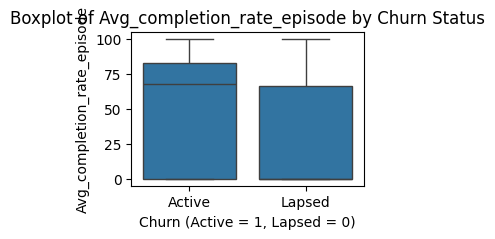

<Figure size 300x200 with 0 Axes>

<Axes: xlabel='rC_Giving__Primary_Membership_Status__c', ylabel='Total_Amount'>

Text(0.5, 1.0, 'Boxplot of Total_Amount by Churn Status')

Text(0.5, 0, 'Churn (Active = 1, Lapsed = 0)')

Text(0, 0.5, 'Total_Amount')

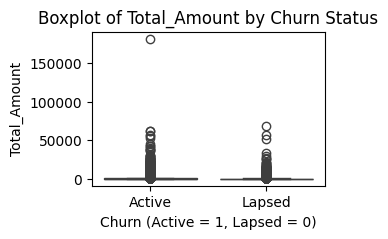

In [ ]:
numerical_features = [
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes',
       'Streaming_time',
       'Avg_completion_rate_episode','Total_Amount']
for feature in numerical_features:
    plt.figure(figsize=(3, 2))
    sns.boxplot(x='rC_Giving__Primary_Membership_Status__c', y=feature, data=comb_df)
    plt.title(f'Boxplot of {feature} by Churn Status')
    plt.xlabel('Churn (Active = 1, Lapsed = 0)')
    plt.ylabel(feature)
    plt.show();

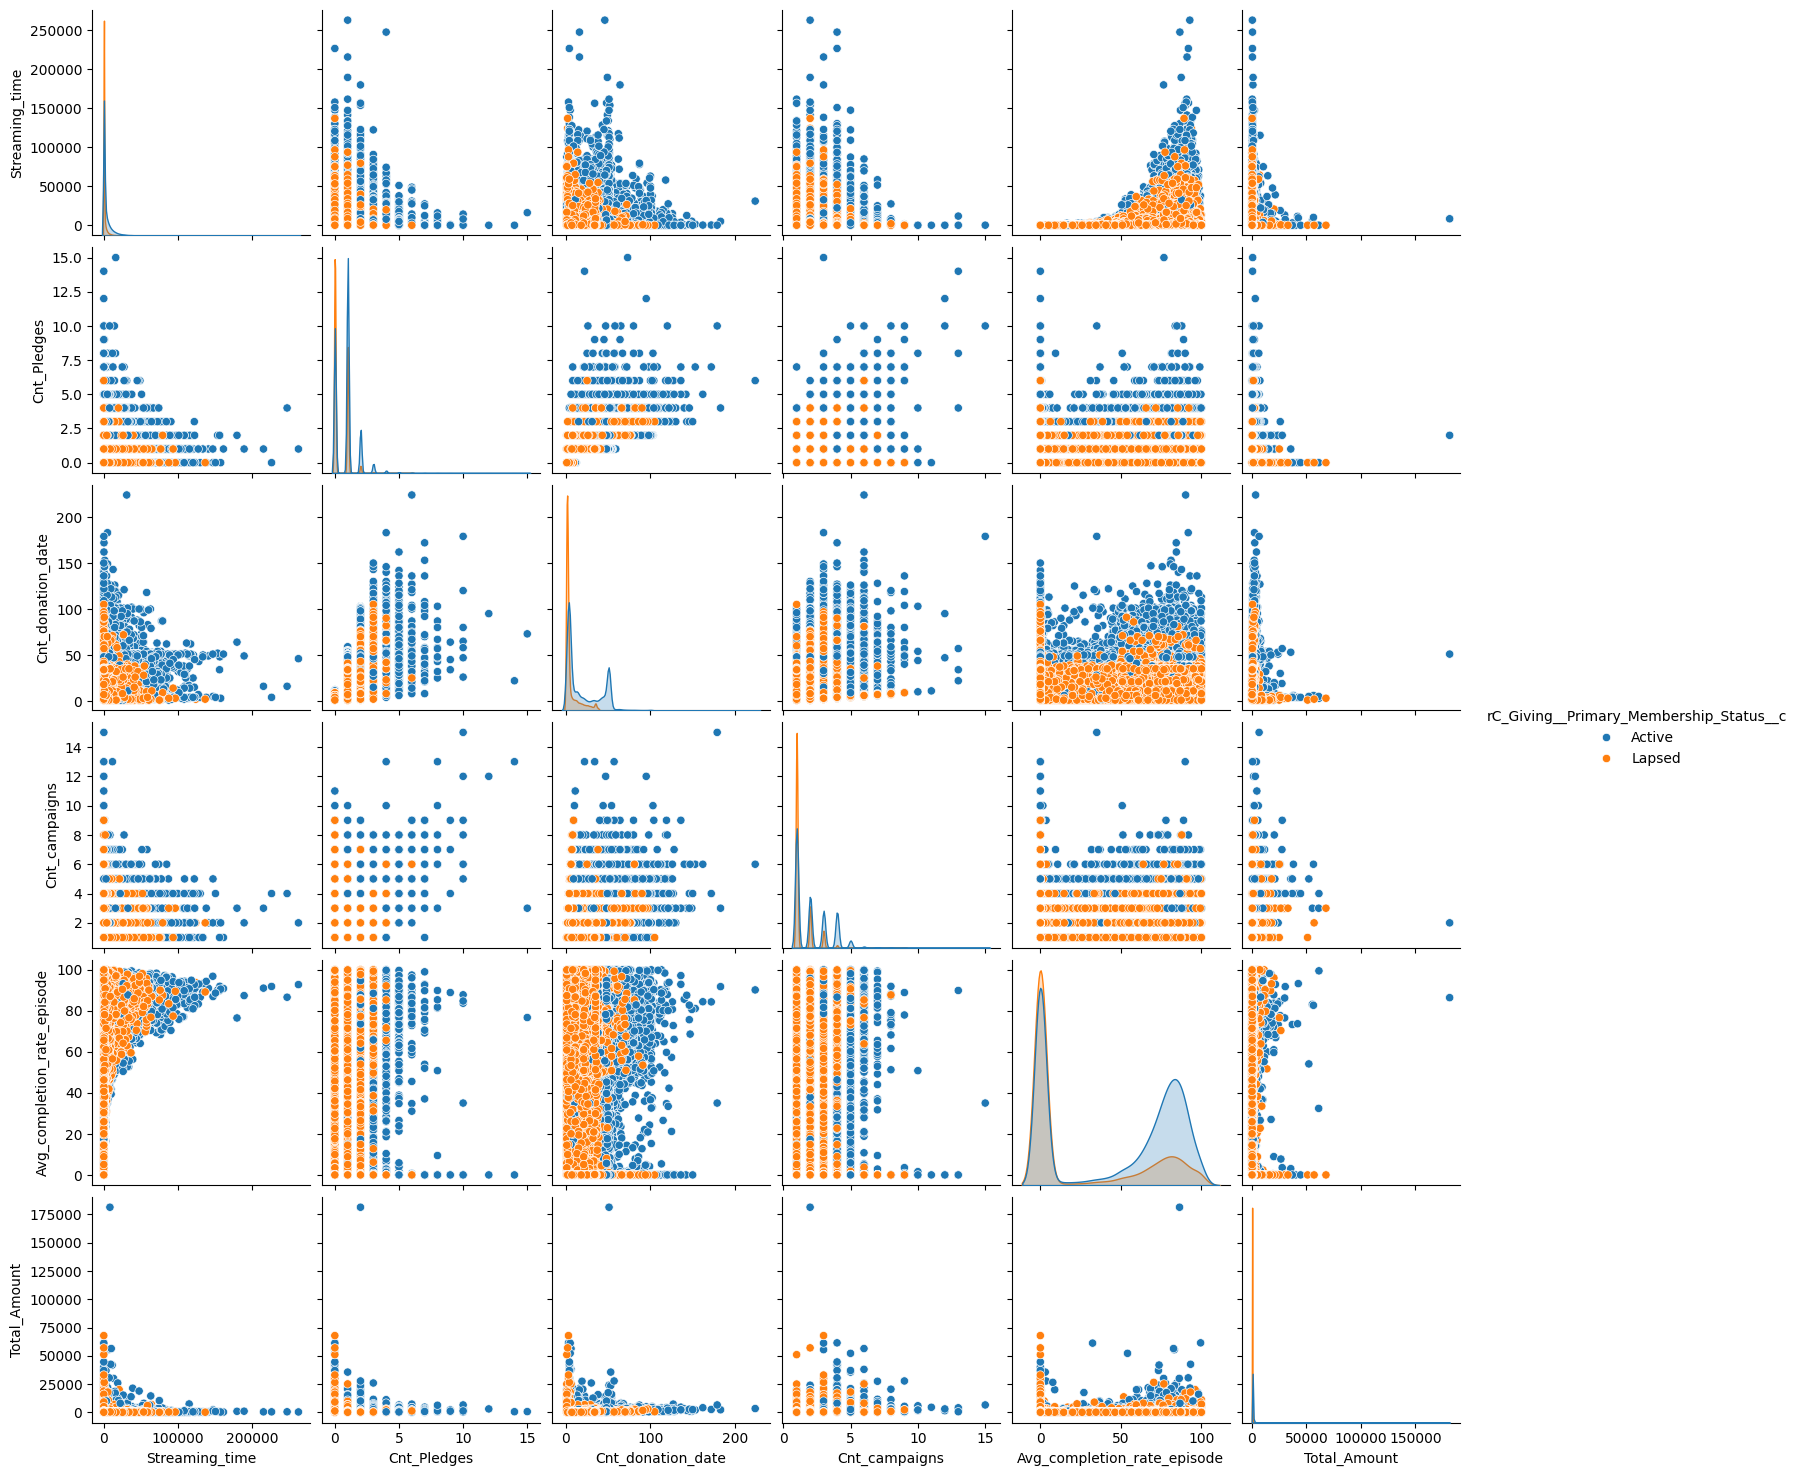

In [ ]:
features = ['Streaming_time','Cnt_Pledges','Cnt_donation_date','Cnt_campaigns',
       'Avg_completion_rate_episode', 'Total_Amount','rC_Giving__Primary_Membership_Status__c']

sns.pairplot(comb_df[features], kind='scatter',hue='rC_Giving__Primary_Membership_Status__c')
plt.show()

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Number of Donations vs Total Amount Donated')

Text(0.5, 0, 'Number of Donations')

Text(0, 0.5, 'Total Amount Donated')

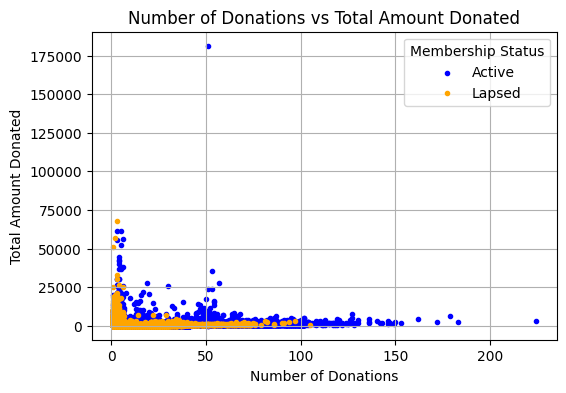

In [ ]:
color_map = {
    'Active': 'blue',
    'Lapsed': 'orange'
}

plt.figure(figsize=(6, 4))

for status in color_map.keys():
    subset = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == status]
    plt.scatter(subset['Cnt_donation_date'], subset['Total_Amount'],
                color=color_map[status], label=status, marker='.')

plt.title('Number of Donations vs Total Amount Donated')
plt.xlabel('Number of Donations')
plt.ylabel('Total Amount Donated')
plt.grid()

plt.legend(title='Membership Status')
plt.show()

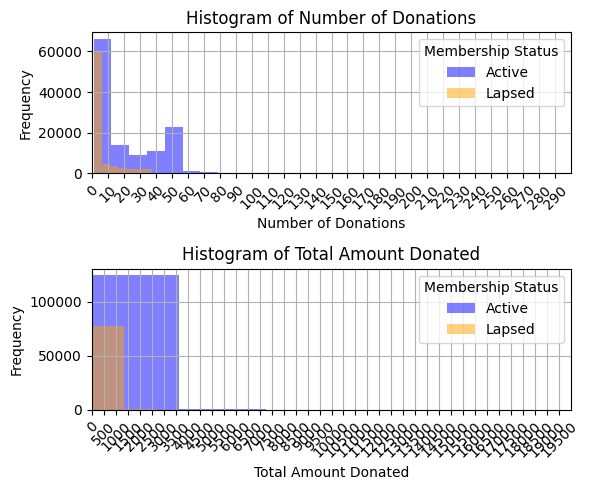

In [ ]:
plt.figure(figsize=(6, 5))

# Histogram for No_of_Donations
plt.subplot(2, 1, 1)
for status in ['Active', 'Lapsed']:
    subset = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == status]
    plt.hist(
        subset['Cnt_donation_date'],
        bins=20,
        alpha=0.5,
        label=status,
        color='blue' if status == 'Active' else 'orange'
    )

plt.title('Histogram of Number of Donations')
plt.xlabel('Number of Donations')
plt.ylabel('Frequency')
plt.xlim(0, 300)
plt.xticks(range(0, 300, 10), rotation=45)
plt.legend(title='Membership Status')
plt.grid()

# Histogram for Total_Amount
plt.subplot(2, 1, 2)
for status in ['Active', 'Lapsed']:
    subset = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == status]
    plt.hist(
        subset['Total_Amount'],
        bins=50,
        alpha=0.5,
        label=status,
        color='blue' if status == 'Active' else 'orange'
    )

plt.title('Histogram of Total Amount Donated')
plt.xlabel('Total Amount Donated')
plt.ylabel('Frequency')
plt.xlim(0, 20000)
plt.xticks(range(0, 20000, 500), rotation=45)
plt.legend(title='Membership Status')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show();


From above graphs, most of the poeple who lapsed are below total_amount < 1500 and most lapsed users made less than 10 transactions.

<Figure size 600x400 with 0 Axes>

Text(0.5, 1.0, 'Number of campaigns vs Total Amount Donated')

Text(0.5, 0, 'No.of camapigns')

Text(0, 0.5, 'Total Amount Donated')

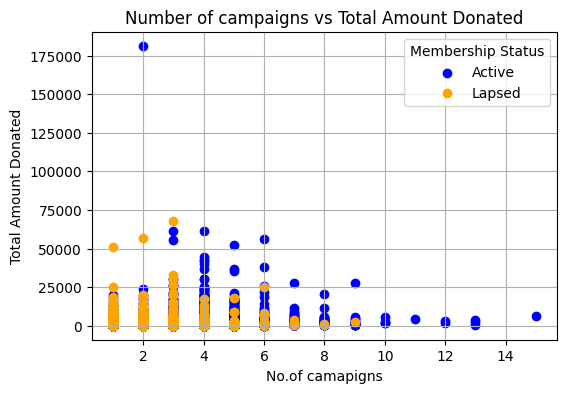

In [ ]:
color_map = {
    'Active': 'blue',
    'Lapsed': 'orange'
}

plt.figure(figsize=(6, 4))

for status in color_map.keys():
    subset = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == status]
    plt.scatter(subset['Cnt_campaigns'], subset['Total_Amount'],
                color=color_map[status], label=status, marker='o')
plt.title('Number of campaigns vs Total Amount Donated')
plt.xlabel('No.of camapigns')
plt.ylabel('Total Amount Donated')
plt.grid()

plt.legend(title='Membership Status')
plt.show()

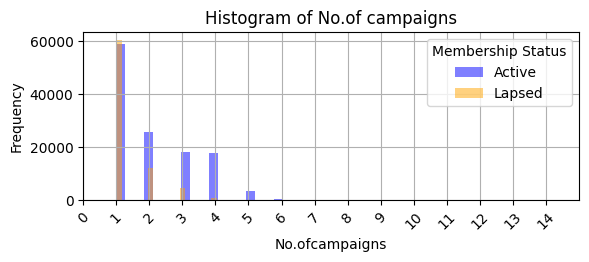

In [ ]:
plt.subplot(2, 1, 2)
for status in ['Active', 'Lapsed']:
    subset = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == status]
    plt.hist(
        subset['Cnt_campaigns'],
        bins=50,
        alpha=0.5,
        label=status,
        color='blue' if status == 'Active' else 'orange'
    )

plt.title('Histogram of No.of campaigns')
plt.xlabel('No.ofcampaigns')
plt.ylabel('Frequency')
plt.xlim(0, 15)
plt.xticks(range(0, 15, 1), rotation=45)
plt.legend(title='Membership Status')
plt.grid()
plt.show();

# From below gragh, most of the people who lapsed donated through 1 campaign only.

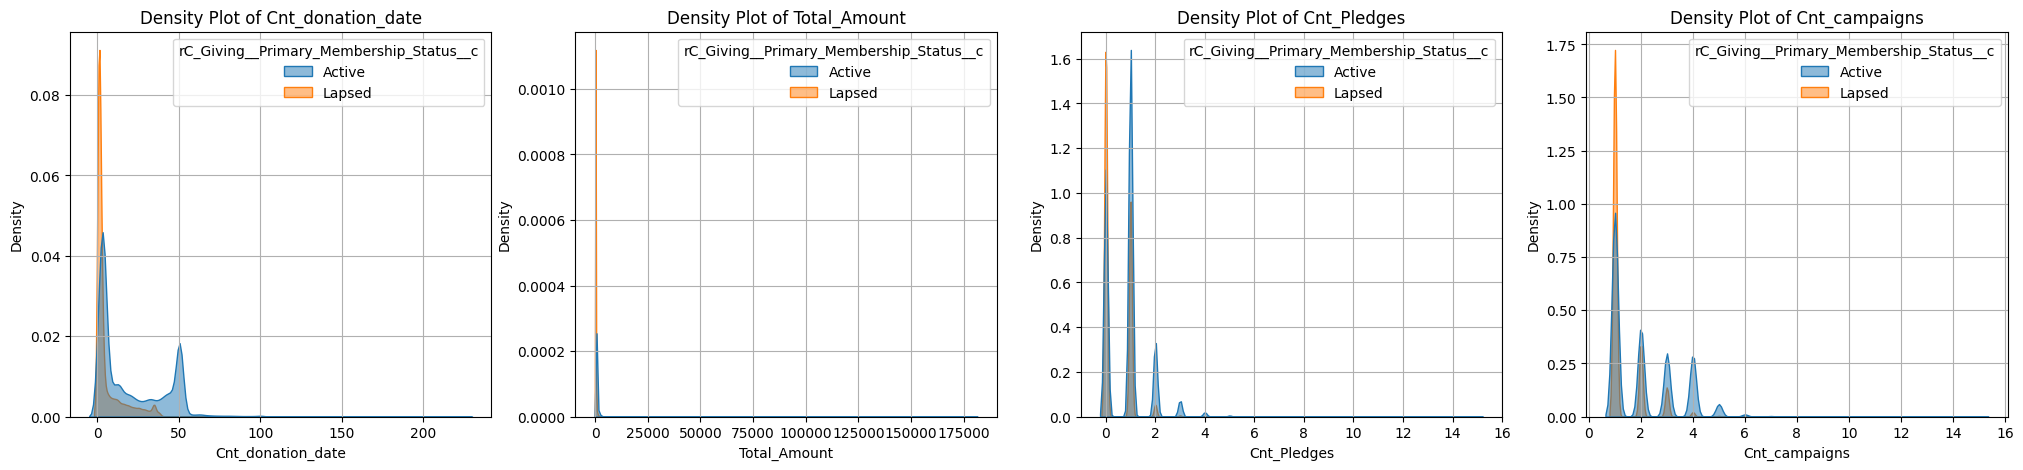

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(25, 5))

columns_to_plot = ['Cnt_donation_date', 'Total_Amount', 'Cnt_Pledges', 'Cnt_campaigns']
for ax, column in zip(axes, columns_to_plot):
    sns.kdeplot(data=comb_df, x=column,hue='rC_Giving__Primary_Membership_Status__c',fill=True, ax=ax, alpha=0.5)
    ax.set_title(f'Density Plot of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Density')
    ax.grid()
plt.show();

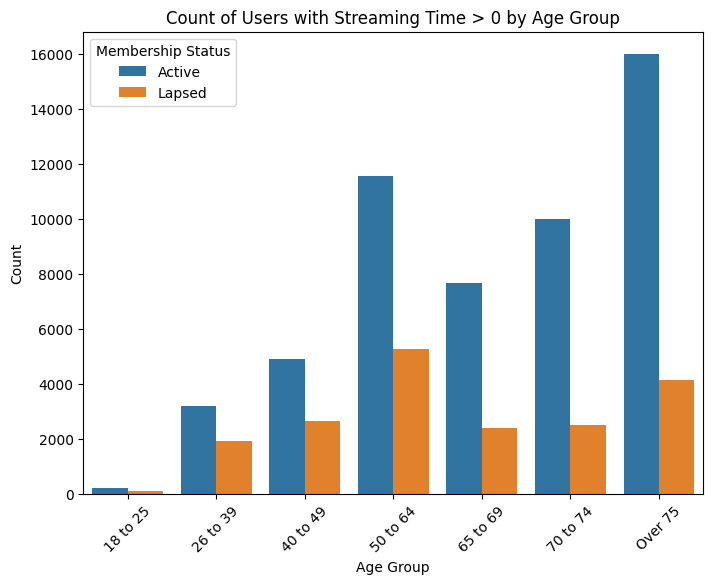

In [ ]:
filtered_df = comb_df[comb_df['Streaming_time'] > 0]
age_counts = filtered_df.groupby(['rC_Bios__Age__c', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')

plt.figure(figsize=(8, 6))
sns.barplot(data=age_counts, x='rC_Bios__Age__c', y='count', hue='rC_Giving__Primary_Membership_Status__c')

plt.title('Count of Users with Streaming Time > 0 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Membership Status')
plt.show();

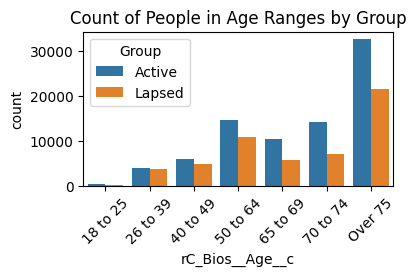

In [ ]:
age_counts = comb_df.groupby(['rC_Bios__Age__c', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')
plt.figure(figsize=(4, 2))
sns.barplot(data=age_counts, x='rC_Bios__Age__c', y='count', hue='rC_Giving__Primary_Membership_Status__c')
plt.title('Count of People in Age Ranges by Group')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show();

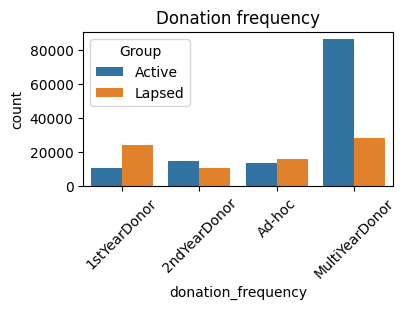

In [ ]:
donation_counts = comb_df.groupby(['donation_frequency', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')

plt.figure(figsize=(4, 2))
sns.barplot(data=donation_counts, x='donation_frequency', y='count', hue='rC_Giving__Primary_Membership_Status__c')
plt.title('Donation frequency')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show();

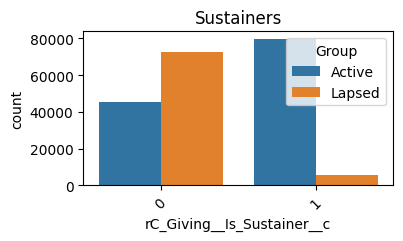

In [ ]:
sustainers_counts = comb_df.groupby(['rC_Giving__Is_Sustainer__c', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')

plt.figure(figsize=(4, 2))
sns.barplot(data= sustainers_counts, x='rC_Giving__Is_Sustainer__c', y='count', hue='rC_Giving__Primary_Membership_Status__c')
plt.title('Sustainers')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.show();

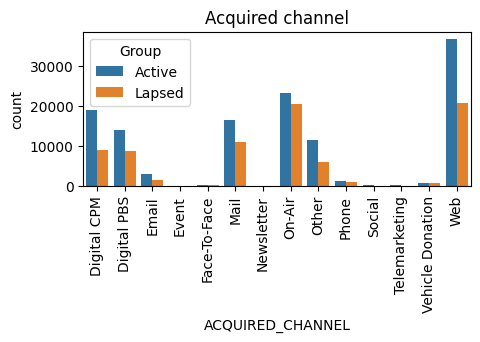

In [ ]:
channel_counts = comb_df.groupby(['ACQUIRED_CHANNEL', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')

plt.figure(figsize=(5, 2))
sns.barplot(data=channel_counts, x='ACQUIRED_CHANNEL', y='count', hue='rC_Giving__Primary_Membership_Status__c')
plt.title('Acquired channel')
plt.xticks(rotation=90)
plt.legend(title='Group')
plt.show();

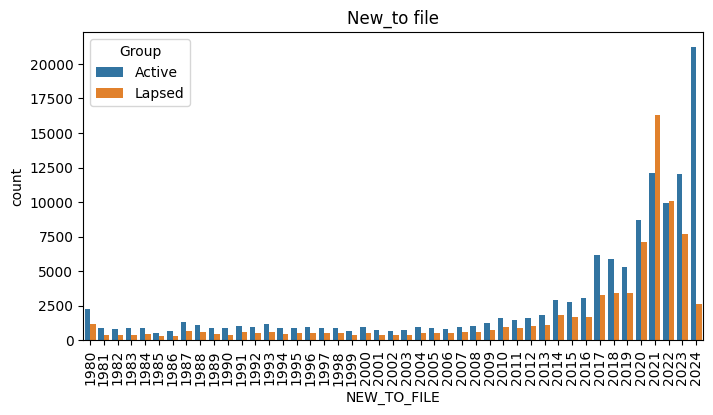

In [ ]:
new_counts = comb_df.groupby(['NEW_TO_FILE', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')

plt.figure(figsize=(8, 4))
sns.barplot(data=new_counts, x='NEW_TO_FILE', y='count', hue='rC_Giving__Primary_Membership_Status__c')
plt.title('New_to file')
plt.xticks(rotation=90)
plt.legend(title='Group')
plt.show();

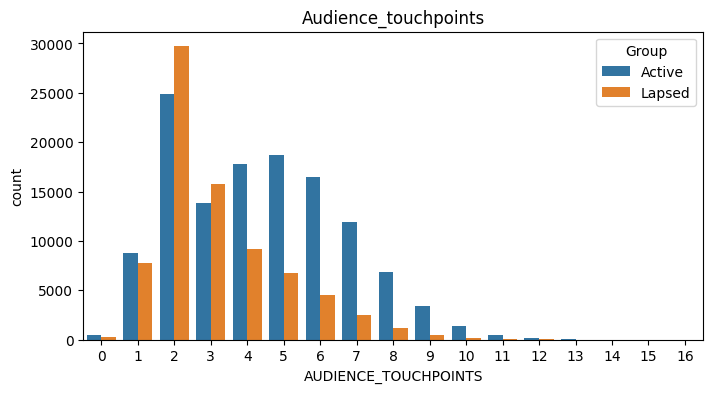

In [ ]:
touch_counts = comb_df.groupby(['AUDIENCE_TOUCHPOINTS', 'rC_Giving__Primary_Membership_Status__c']).size().reset_index(name='count')

plt.figure(figsize=(8, 4))
sns.barplot(data=touch_counts, x='AUDIENCE_TOUCHPOINTS', y='count', hue='rC_Giving__Primary_Membership_Status__c')
plt.title('Audience_touchpoints')
plt.legend(title='Group')
plt.show();

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Cnt_donation_date', ylabel='Density'>

Text(0.5, 1.0, 'Density Plot of Number of Donations')

Text(0.5, 0, 'Number of Donations')

Text(0, 0.5, 'Density')

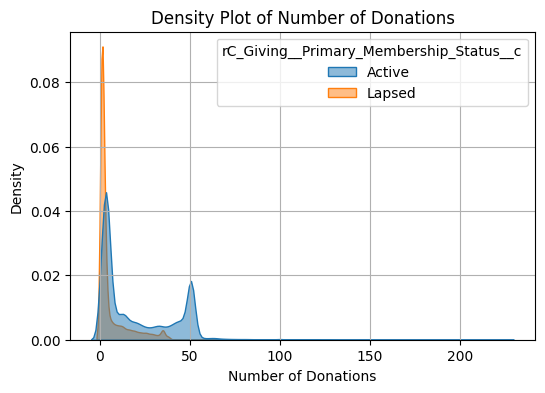

In [ ]:
plt.figure(figsize=(6, 4))

sns.kdeplot(data=comb_df, x='Cnt_donation_date', hue='rC_Giving__Primary_Membership_Status__c', fill=True, alpha=0.5)

# Add titles and labels
plt.title('Density Plot of Number of Donations')
plt.xlabel('Number of Donations')
plt.ylabel('Density')
plt.grid()

# Show the plot
plt.show()

(array([5.35294573e-03, 9.03637167e-04, 3.16753927e-04, 1.36857911e-04,
        6.45571564e-05, 3.11374164e-05, 1.85031244e-05, 1.39384770e-05,
        6.92848270e-06, 3.66802025e-06, 2.20081215e-06, 1.38569654e-06,
        1.54871966e-06, 1.38569654e-06, 7.33604051e-07, 2.44534684e-07,
        2.44534684e-07, 3.26046245e-07, 1.63023122e-07, 0.00000000e+00,
        8.15115612e-08, 8.15115612e-08, 0.00000000e+00, 0.00000000e+00,
        8.15115612e-08, 8.15115612e-08, 0.00000000e+00, 0.00000000e+00,
        8.15115612e-08, 8.15115612e-08]),
 array([2.77783333e-09, 1.45822567e+02, 2.91645133e+02, 4.37467700e+02,
        5.83290266e+02, 7.29112833e+02, 8.74935399e+02, 1.02075797e+03,
        1.16658053e+03, 1.31240310e+03, 1.45822567e+03, 1.60404823e+03,
        1.74987080e+03, 1.89569337e+03, 2.04151593e+03, 2.18733850e+03,
        2.33316106e+03, 2.47898363e+03, 2.62480620e+03, 2.77062876e+03,
        2.91645133e+03, 3.06227390e+03, 3.20809646e+03, 3.35391903e+03,
        3.49974160e+03

(array([1.09296891e-02, 1.28870423e-03, 4.55808661e-04, 2.23530900e-04,
        1.00102968e-04, 6.17139658e-05, 3.59593187e-05, 2.23530900e-05,
        1.36062287e-05, 7.77498782e-06, 6.31717761e-06, 4.85936739e-06,
        7.77498782e-06, 1.94374696e-06, 4.85936739e-07, 9.71873478e-07,
        1.45781022e-06, 4.85936739e-07, 0.00000000e+00, 4.85936739e-07,
        4.85936739e-07, 4.85936739e-07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.85936739e-07]),
 array([2.77783333e-09, 7.59561893e+01, 1.51912379e+02, 2.27868568e+02,
        3.03824757e+02, 3.79780947e+02, 4.55737136e+02, 5.31693325e+02,
        6.07649514e+02, 6.83605704e+02, 7.59561893e+02, 8.35518082e+02,
        9.11474272e+02, 9.87430461e+02, 1.06338665e+03, 1.13934284e+03,
        1.21529903e+03, 1.29125522e+03, 1.36721141e+03, 1.44316760e+03,
        1.51912379e+03, 1.59507998e+03, 1.67103616e+03, 1.74699235e+03,
        1.82294854e+03

Text(0.5, 1.0, 'Streaming Behaviour of Donors FY21 to FY24')

Text(0.5, 0, 'Streaming Hours')

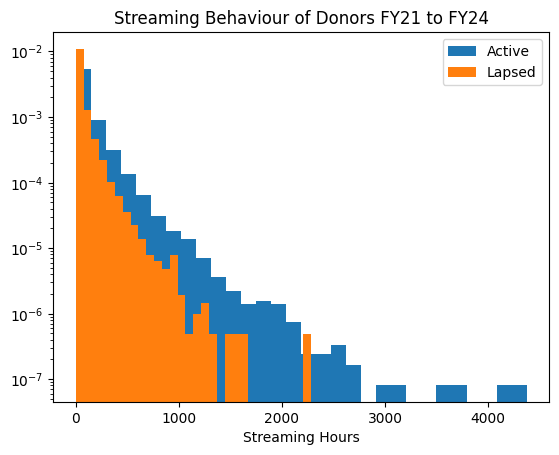

In [ ]:
plt.hist(Active.Streaming_time/60,bins=30, density=True, label='Active')
plt.hist(Lapsed.Streaming_time/60,bins=30, density=True, label='Lapsed')
plt.title('Streaming Behaviour of Donors FY21 to FY24'); plt.xlabel('Streaming Hours')
plt.yscale('log')
plt.legend()

In [ ]:
#plt.hist(Active.Total_Amount,bins=15, density=True,label='Active')
#plt.hist(Lapsed.Total_Amount,bins=15, density=True ,label='Lapsed')
#plt.title('Donation Pattern $ from FY21 to FY24'); plt.xlabel('Total Amount')
#plt.yscale('log')
#plt.legend()

AttributeError: 'DataFrame' object has no attribute 'Total_Amount'

## Data Preprocessing & Feature Selection

In [ ]:
comb_df.shape; comb_df.columns

(203535, 48)

Index(['ContactId', 'mvcms__activation_date__c', 'mvcms__expire_date__c',
       'rC_Giving__Primary_Membership_Status__c', 'AUDIENCE_TOUCHPOINTS',
       'LAST_INTERACTION_DATE', 'ACQUIRED_ON', 'donation_frequency',
       'TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024', 'TOTAL_AMOUNT_YTD', 'DBUSA_Income', 'DBUSA_Career',
       'Occupation_Individual_Description', 'ShippingCity', 'ShippingState',
       'ShippingCountry', 'rC_Bios__Age__c', 'rC_Bios__Gender__c',
       'NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN', 'OPTIN',
       'rC_Giving__Is_Sustainer__c', 'NEW_TO_FILE', 'Event_count',
       'HAS_ATTEND_AN_EVENT', 'ACQUIRED_CHANNEL', 'LastDonationDate',
       'GivingPortfolio_Indicator__c', 'Campaign_Channel__c',
       'Cnt_donation_date', 'Cnt_Pledges', 'Cnt_campaigns',
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_da

In [ ]:
comb_df.columns[comb_df.isnull().mean()*100 <= 5]

Index(['ContactId', 'rC_Giving__Primary_Membership_Status__c',
       'AUDIENCE_TOUCHPOINTS', 'LAST_INTERACTION_DATE', 'donation_frequency',
       'ShippingCity', 'ShippingState', 'ShippingCountry',
       'rC_Bios__Gender__c', 'NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN',
       'OPTIN', 'rC_Giving__Is_Sustainer__c', 'NEW_TO_FILE', 'Event_count',
       'HAS_ATTEND_AN_EVENT', 'ACQUIRED_CHANNEL', 'LastDonationDate',
       'GivingPortfolio_Indicator__c', 'Campaign_Channel__c',
       'Cnt_donation_date', 'Cnt_Pledges', 'Cnt_campaigns',
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_day', 'last_watched_day',
       'Avg_completion_rate_episode', 'No_donations_fy21_fy24',
       'Total_Amount'],
      dtype='object')

In [ ]:
comb_df[['ShippingCity','ShippingState','ShippingCountry', 'GivingPortfolio_Indicator__c','No_donations_fy21_fy24']].head()

,ShippingCity,ShippingState,ShippingCountry,GivingPortfolio_Indicator__c,No_donations_fy21_fy24
0,Port Angeles,WA,USA,Direct Marketing,1
1,Seattle,WA,USA,Direct Marketing,3
2,Burnaby,BC,CAN,Direct Marketing,3
3,Kirkland,WA,USA,Direct Marketing,3
4,Friday Harbor,WA,USA,Direct Marketing,3


In [ ]:
comb_df.ShippingState = comb_df.ShippingState.fillna('Unknown')
comb_df.GivingPortfolio_Indicator__c = comb_df.GivingPortfolio_Indicator__c.fillna('Unknown')
comb_df.rC_Bios__Age__c = comb_df.rC_Bios__Age__c.fillna('Unknown')

In [ ]:
comb_df.ShippingCountry = comb_df.ShippingCountry.fillna(comb_df.ShippingCountry.mode()[0])

In [ ]:
comb_df.donated_before_FY21 = comb_df.donated_before_FY21.fillna('No')

In [ ]:
comb_df[['NEWSLETTER_SUBSCRIBER','IS_PART_OF_CAMPAIGN','OPTIN', 'HAS_ATTEND_AN_EVENT', 'donated_before_FY21']] = comb_df[['NEWSLETTER_SUBSCRIBER','IS_PART_OF_CAMPAIGN','OPTIN', 'HAS_ATTEND_AN_EVENT', 'donated_before_FY21']].apply(
    lambda x: x.replace({'Yes':1, 'No':0}, )
)

In [ ]:
comb_df.rC_Giving__Primary_Membership_Status__c = comb_df.rC_Giving__Primary_Membership_Status__c.replace({
    'Active':0, 'Lapsed':1
})

In [ ]:
comb_df.donation_frequency = comb_df.donation_frequency.astype('category').cat.codes

In [ ]:
comb_df.rC_Bios__Age__c = comb_df.rC_Bios__Age__c.astype('category').cat.codes

In [ ]:
comb_df.donation_frequency.value_counts()

,count
donation_frequency,
3,114285
0,34907
2,29333
1,25010


In [ ]:
comb_df.ShippingState = comb_df.ShippingState.astype('category').cat.codes

In [ ]:
comb_df.GivingPortfolio_Indicator__c = comb_df.GivingPortfolio_Indicator__c.astype('category').cat.codes

In [ ]:
comb_df.rC_Bios__Gender__c = comb_df.rC_Bios__Gender__c.astype('category').cat.codes

In [ ]:
def count_genres(genres):
    if isinstance(genres, str):
        return len(set(genres.split(',')))
    else:
        return 0

comb_df['distinct_genre_count'] = comb_df['Genres_watched'].apply(count_genres)

In [ ]:
lst = ['rC_Bios__Gender__c', 'rC_Bios__Age__c']
for i in lst:
    comb_df[i] = comb_df[i].astype('category').cat.codes

In [ ]:
obj = [ 'LAST_INTERACTION_DATE','LastDonationDate',  'fisrt_watch_day',
       'last_watched_day']
for i in obj:
    comb_df[i] = pd.to_datetime(comb_df[i], errors='coerce', utc=True).dt.date

In [ ]:
timestamp = pd.Timestamp('2024-09-22 00:00:00')
today = timestamp.date()
today

datetime.date(2024, 9, 22)

In [ ]:
today = pd.to_datetime('today')

date_columns = ['LAST_INTERACTION_DATE', 'LastDonationDate']

for col in date_columns:
    comb_df[col] = pd.to_datetime(comb_df[col], errors='coerce')
    if comb_df[col].isnull().all():
        print(f"All values in {col} are non-convertible or missing.")
    else:
        comb_df[f'{col}_Days'] = (today - comb_df[col]).dt.days

In [ ]:
comb_df.rC_Giving__Primary_Membership_Status__c = comb_df.rC_Giving__Primary_Membership_Status__c.astype(int)

In [ ]:
comb_df.select_dtypes(include=['int', 'float']).columns;
comb_df.select_dtypes(include=['object']).columns;

In [ ]:
comb_df.NEW_TO_FILE = comb_df.NEW_TO_FILE.astype('category').cat.codes

In [ ]:
comb_df.ACQUIRED_CHANNEL = comb_df.ACQUIRED_CHANNEL.astype('category').cat.codes

In [ ]:
comb_df.Campaign_Channel__c = comb_df.Campaign_Channel__c.astype('category').cat.codes

In [ ]:
comb_df.Campaign_Channel__c.value_counts()

,count
Campaign_Channel__c,
12,57838
4,44444
0,31857
1,21361
6,17983
2,12589
5,7086
8,5792
7,2983


Correlation Coefficient: This method calculates the correlation between features. Features with a high correlation (above a threshold like 0.8) are dropped to avoid redundancy.

Chi-Square Test: This statistical test evaluates the relationship between categorical features and the target variable, selecting the top features based on their chi-square score.

Mutual Information: Measures the amount of information shared between each feature and the target variable, selecting the most informative features.

In [ ]:
comb_df.columns

Index(['ContactId', 'mvcms__activation_date__c', 'mvcms__expire_date__c',
       'rC_Giving__Primary_Membership_Status__c', 'AUDIENCE_TOUCHPOINTS',
       'LAST_INTERACTION_DATE', 'ACQUIRED_ON', 'donation_frequency',
       'TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024', 'TOTAL_AMOUNT_YTD', 'DBUSA_Income', 'DBUSA_Career',
       'Occupation_Individual_Description', 'ShippingCity', 'ShippingState',
       'ShippingCountry', 'rC_Bios__Age__c', 'rC_Bios__Gender__c',
       'NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN', 'OPTIN',
       'rC_Giving__Is_Sustainer__c', 'NEW_TO_FILE', 'Event_count',
       'HAS_ATTEND_AN_EVENT', 'ACQUIRED_CHANNEL', 'LastDonationDate',
       'GivingPortfolio_Indicator__c', 'Campaign_Channel__c',
       'Cnt_donation_date', 'Cnt_Pledges', 'Cnt_campaigns',
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_da

In [ ]:

comb_df["avg_donation"]=comb_df["Total_Amount"]/comb_df["Cnt_campaigns"]
columns_to_include = [
    'AUDIENCE_TOUCHPOINTS',
    'donation_frequency','Campaign_Channel__c',
    'rC_Bios__Age__c', 'rC_Bios__Gender__c', 'NEWSLETTER_SUBSCRIBER',
    'IS_PART_OF_CAMPAIGN', 'OPTIN', 'rC_Giving__Is_Sustainer__c',
    'NEW_TO_FILE', 'Event_count', 'HAS_ATTEND_AN_EVENT',
    'ACQUIRED_CHANNEL', 'GivingPortfolio_Indicator__c', 'Cnt_donation_date', 'Cnt_Pledges',
    'Cnt_campaigns', 'Cnt_of_additional_giving', 'No.of days watched', 'Show', 'Episodes',
    'Streaming_time',
    'Avg_completion_rate_episode', 'donated_before_FY21',
    'No_donations_fy21_fy24', 'Total_Amount', 'distinct_genre_count',
    'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days',
    'rC_Giving__Primary_Membership_Status__c', "avg_donation"
]

correlation_matrix = comb_df[columns_to_include].corr()
target_variable = 'rC_Giving__Primary_Membership_Status__c'
correlations = correlation_matrix[target_variable].drop(target_variable)


print(correlations)


AUDIENCE_TOUCHPOINTS           -0.29
donation_frequency             -0.33
Campaign_Channel__c             0.03
rC_Bios__Age__c                -0.06
rC_Bios__Gender__c             -0.04
NEWSLETTER_SUBSCRIBER           0.03
IS_PART_OF_CAMPAIGN             0.01
OPTIN                          -0.25
rC_Giving__Is_Sustainer__c     -0.56
NEW_TO_FILE                     0.03
Event_count                    -0.05
HAS_ATTEND_AN_EVENT            -0.06
ACQUIRED_CHANNEL                0.01
GivingPortfolio_Indicator__c    0.19
Cnt_donation_date              -0.38
Cnt_Pledges                    -0.29
Cnt_campaigns                  -0.33
Cnt_of_additional_giving       -0.11
No.of days watched             -0.22
Show                           -0.23
Episodes                       -0.20
Streaming_time                 -0.20
Avg_completion_rate_episode    -0.28
donated_before_FY21            -0.03
No_donations_fy21_fy24         -0.51
Total_Amount                   -0.11
distinct_genre_count           -0.27
L

In [ ]:
# Positive correlation - LAST_INTERACTION_DATE_Days, LastDonationDate_Days
# Negative correlation - LastDonationDate, rC_Giving__Is_Sustainer__c, No_donations_fy21_fy24

In [ ]:
lapsed_users = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == 1]

# Filter for active users with non-null total_Amount_ytd
active_users_valid = comb_df[
    (comb_df['rC_Giving__Primary_Membership_Status__c'] == 0) &
    (comb_df['TOTAL_AMOUNT_YTD'].notnull())
]

# Combine the two filtered DataFrames
train_data = pd.concat([lapsed_users, active_users_valid])
predict_data= comb_df[
    (comb_df['rC_Giving__Primary_Membership_Status__c'] == 0) &
    (comb_df['TOTAL_AMOUNT_YTD'].isnull())]

In [ ]:
print("Lapsed Users Count:", lapsed_users.shape[0])

Lapsed Users Count: 78301


In [ ]:
lapsed_users.shape

(78301, 52)

In [ ]:
data = train_data['rC_Giving__Primary_Membership_Status__c'].value_counts()
data

,count
rC_Giving__Primary_Membership_Status__c,
1,78301
0,74751


In [ ]:
predict_data['rC_Giving__Primary_Membership_Status__c'].value_counts()

,count
rC_Giving__Primary_Membership_Status__c,
0,50483


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

lst = ['AUDIENCE_TOUCHPOINTS',
    'donation_frequency','Campaign_Channel__c',
    'rC_Bios__Age__c', 'rC_Bios__Gender__c', 'NEWSLETTER_SUBSCRIBER',
    'IS_PART_OF_CAMPAIGN', 'OPTIN', 'rC_Giving__Is_Sustainer__c',
    'NEW_TO_FILE', 'Event_count', 'HAS_ATTEND_AN_EVENT',
    'ACQUIRED_CHANNEL', 'GivingPortfolio_Indicator__c', 'Cnt_donation_date', 'Cnt_Pledges',
    'Cnt_campaigns', 'Cnt_of_additional_giving', 'No.of days watched', 'Show', 'Episodes',
    'Streaming_time',
    'Avg_completion_rate_episode', 'donated_before_FY21',
    'No_donations_fy21_fy24', 'Total_Amount', 'distinct_genre_count',
    'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', "avg_donation"
      ]

X =  train_data[lst]
y = train_data['rC_Giving__Primary_Membership_Status__c']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mutual_info_selector = SelectKBest(mutual_info_classif, k=15)
X_train_mutual_info = mutual_info_selector.fit_transform(X_train_scaled, y_train)

selected_features_mi = mutual_info_selector.get_support(indices=True)
mi_feature_names = X.columns[selected_features_mi]
print(f"Top {len(mi_feature_names)} features selected by Mutual Information: {mi_feature_names}")

Top 15 features selected by Mutual Information: Index(['AUDIENCE_TOUCHPOINTS', 'donation_frequency',
       'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'Cnt_Pledges',
       'No.of days watched', 'Show', 'Episodes', 'Streaming_time',
       'No_donations_fy21_fy24', 'Total_Amount', 'distinct_genre_count',
       'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'avg_donation'],
      dtype='object')


In [ ]:
comb_df.columns

Index(['ContactId', 'mvcms__activation_date__c', 'mvcms__expire_date__c',
       'rC_Giving__Primary_Membership_Status__c', 'AUDIENCE_TOUCHPOINTS',
       'LAST_INTERACTION_DATE', 'ACQUIRED_ON', 'donation_frequency',
       'TOTAL_AMOUNT_2021', 'TOTAL_AMOUNT_2022', 'TOTAL_AMOUNT_2023',
       'TOTAL_AMOUNT_2024', 'TOTAL_AMOUNT_YTD', 'DBUSA_Income', 'DBUSA_Career',
       'Occupation_Individual_Description', 'ShippingCity', 'ShippingState',
       'ShippingCountry', 'rC_Bios__Age__c', 'rC_Bios__Gender__c',
       'NEWSLETTER_SUBSCRIBER', 'IS_PART_OF_CAMPAIGN', 'OPTIN',
       'rC_Giving__Is_Sustainer__c', 'NEW_TO_FILE', 'Event_count',
       'HAS_ATTEND_AN_EVENT', 'ACQUIRED_CHANNEL', 'LastDonationDate',
       'GivingPortfolio_Indicator__c', 'Campaign_Channel__c',
       'Cnt_donation_date', 'Cnt_Pledges', 'Cnt_campaigns',
       'Cnt_of_additional_giving', 'No.of days watched',
       'No_of_months_Watched', 'Show', 'Episodes', 'Genres_watched',
       'Streaming_time', 'fisrt_watch_da

In [ ]:
from sklearn.preprocessing import PowerTransformer        #'Total_Amount',
features = ['AUDIENCE_TOUCHPOINTS', 'OPTIN','No_donations_fy21_fy24',
      'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'donation_frequency',
       'Cnt_campaigns', 'No.of days watched', 'Episodes', 'Streaming_time', 'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'Total_Amount', 'distinct_genre_count'
       ]

pt = PowerTransformer(method='yeo-johnson')
train_data[features] = pt.fit_transform(train_data[features])

(array([ 5478.,  4958.,  7669.,  6561., 15347.,  6511.,  7318.,  8140.,
         9033.,  6958.,  9908.,  7242., 13969.,  6030.,  6193.,  6235.,
         8809.,  6942.,  6101.,  3650.]),
 array([-1.83775232, -1.64939712, -1.46104193, -1.27268674, -1.08433154,
        -0.89597635, -0.70762116, -0.51926597, -0.33091077, -0.14255558,
         0.04579961,  0.2341548 ,  0.42251   ,  0.61086519,  0.79922038,
         0.98757557,  1.17593077,  1.36428596,  1.55264115,  1.74099635,
         1.92935154]),
 <BarContainer object of 20 artists>)

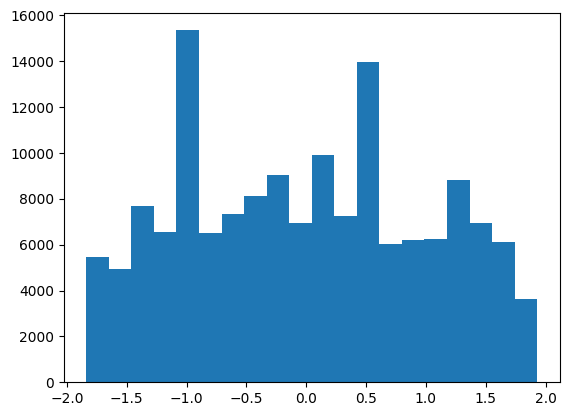

In [ ]:
plt.hist(train_data['Total_Amount'], bins=20)

<Axes: >

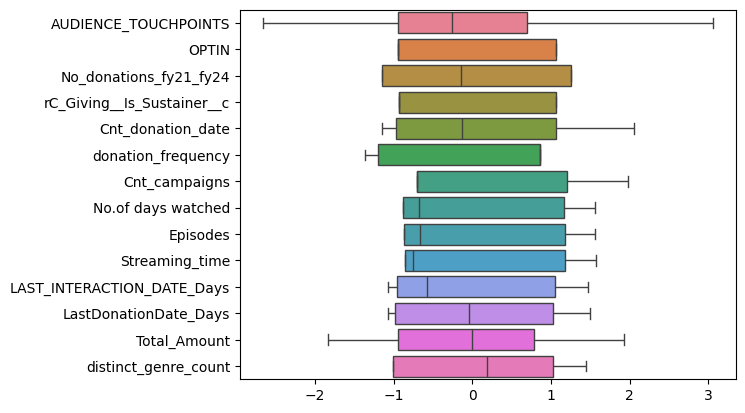

In [ ]:
features = ['AUDIENCE_TOUCHPOINTS', 'OPTIN','No_donations_fy21_fy24',
      'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'donation_frequency',
      'Cnt_campaigns', 'No.of days watched', 'Episodes', 'Streaming_time', 'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'Total_Amount', 'distinct_genre_count']

sns.boxplot(train_data[features], orient='h')

## RFC

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

features = ['AUDIENCE_TOUCHPOINTS', 'OPTIN','No_donations_fy21_fy24',
       'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'donation_frequency',
      'Cnt_campaigns', 'No.of days watched', 'Episodes', 'Streaming_time', 'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'Total_Amount', 'distinct_genre_count'
       ]

scaler = StandardScaler()
train_data[features] = scaler.fit_transform(train_data[features])

X = train_data[features]
y = train_data['rC_Giving__Primary_Membership_Status__c']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
# sm = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier= RandomForestClassifier(n_estimators= 300,max_leaf_nodes=16, criterion="gini",random_state=42, )

classifier.fit(X_train_resampled, y_train_resampled)  # nn=300, nodes=16, probab=0.9

#'AUDIENCE_TOUCHPOINTS', 'OPTIN','No_donations_fy21_fy24',
#       'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'donation_frequency',
#       'Cnt_campaigns', 'No.of days watched', 'Episodes', 'Streaming_time', 'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'Total_Amount', 'distinct_genre_count'

RandomForestClassifier(max_leaf_nodes=16, n_estimators=300, random_state=42)

In [ ]:
y_pred= classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

array([[14950,     0],
       [    0, 15661]])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14950
           1       1.00      1.00      1.00     15661

    accuracy                           1.00     30611
   macro avg       1.00      1.00      1.00     30611
weighted avg       1.00      1.00      1.00     30611



<Axes: ylabel='None'>

Text(0.5, 1.0, 'Feature Importance - Rfcm')

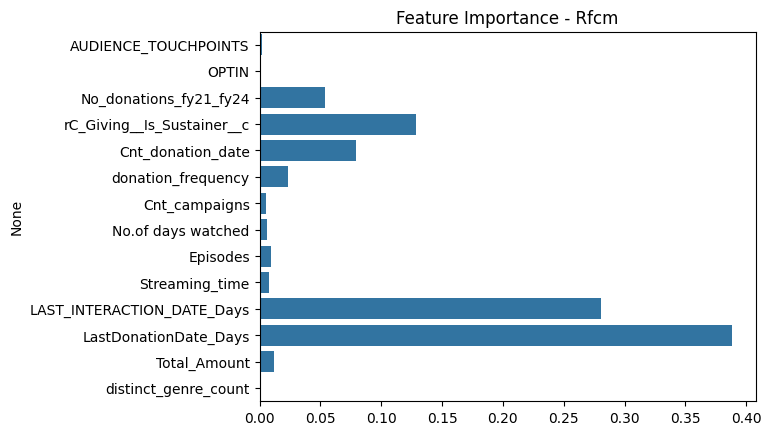

In [ ]:
importances = classifier.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title('Feature Importance - Rfcm')
plt.show()

In [ ]:
#active_users = comb_df[['rC_Giving__Primary_Membership_Status__c'] == 0]
X_active = predict_data[['AUDIENCE_TOUCHPOINTS', 'OPTIN','No_donations_fy21_fy24',
     'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'donation_frequency',
       'Cnt_campaigns', 'No.of days watched', 'Episodes', 'Streaming_time', 'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'Total_Amount', 'distinct_genre_count'
]]
scaler = StandardScaler()
X_active_scaled = scaler.fit_transform(X_active)

y_active_pred = classifier.predict_proba(X_active)[:, 1]

In [ ]:
predicted_churners = np.where(y_active_pred > 0.9, 1, 0)

# Count how many users are predicted to churn
num_churners_predicted = np.sum(predicted_churners)

print(f'Number of users predicted to churn: {num_churners_predicted}')

Number of users predicted to churn: 9949


In [ ]:
predict_data['Predicted_Churn'] = predicted_churners
likely_churners = predict_data[predict_data['Predicted_Churn'] == 1]

likely_churners.to_csv('likely_churners.csv', index=False)

## XGB

In [ ]:
xgb_clf = XGBClassifier(objective='binary:logistic',
                        eval_metric='logloss', random_state=42,n_estimators=200,max_depth=3,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1)
#param_grid = {
 #   'n_estimators': [100],
  #  'max_depth': [5],
   # 'learning_rate': [0.1],
   # 'subsample': [0.8],
   # 'colsample_bytree': [0.8],
   # 'min_child_weight': [3]
#}


xgb_clf.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(cm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 99.95%
Confusion Matrix:
[[14946     4]
 [   11 15650]]


<Axes: ylabel='None'>

Text(0.5, 1.0, 'Feature Importance - XGBM')

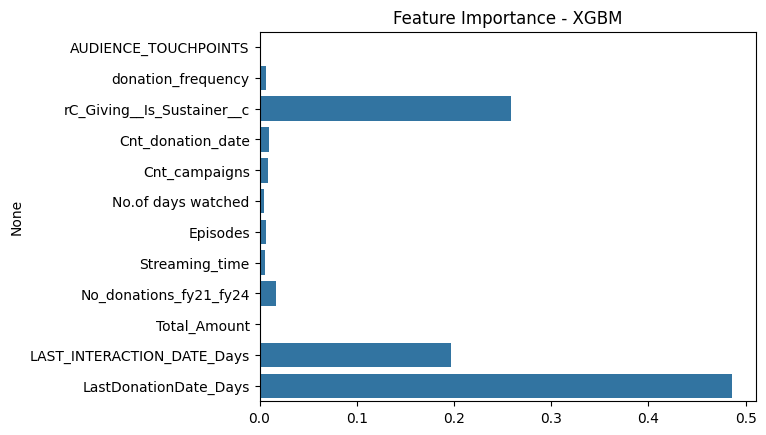

In [ ]:
importances = xgb_clf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title('Feature Importance - XGBM')
plt.show()

In [ ]:
X_test.shape

(30611, 12)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Learning Curves')

Text(0.5, 0, 'Training Size')

Text(0, 0.5, 'Accuracy')

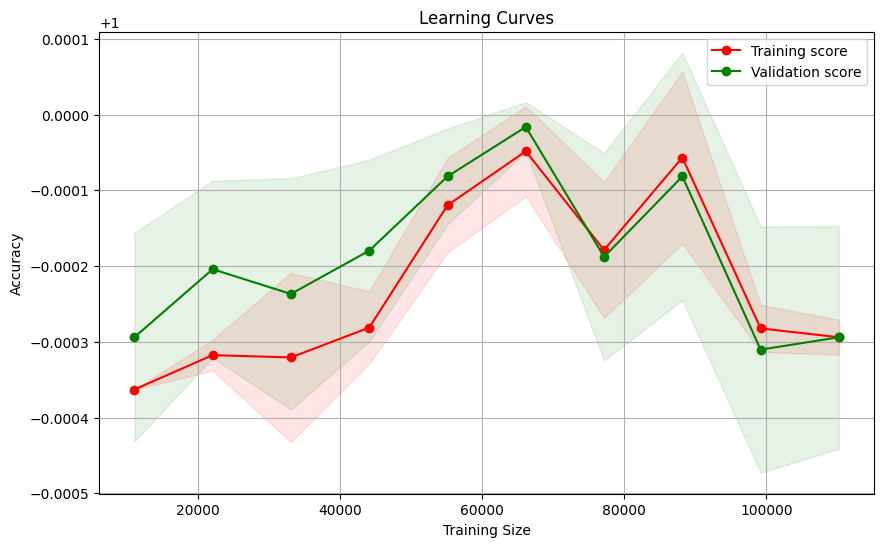

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

train_sizes, train_scores, test_scores = learning_curve(
    xgb_clf, X_train, y_train, cv=10, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)


train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation score')

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
#active_users = comb_df[train_data['rC_Giving__Primary_Membership_Status__c'] == 0]
X_active = predict_data[['AUDIENCE_TOUCHPOINTS', 'donation_frequency',
       'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'Cnt_campaigns',
       'No.of days watched', 'Episodes', 'Streaming_time',
       'No_donations_fy21_fy24', 'Total_Amount',
       'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days'

]]
scaler = StandardScaler()
X_active_scaled = scaler.fit_transform(X_active)

y_active_pred = xgb_clf.predict(X_active)

In [ ]:
len(y_active_pred)

50483

In [ ]:
predict_data['XGBM_output'] = y_active_pred

In [ ]:
XBG_output =predict_data[predict_data['XGBM_output']==1]
XBG_output.shape

(50483, 54)

In [ ]:
#XBG_output[XBG_output['XGBM_output']==1].TOTAL_AMOUNT_YTD.notnull().sum()

54

In [ ]:
# LOGISTIC

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

softmax_l = LogisticRegression(C=10, random_state=42)
softmax_l.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=10, random_state=42)

In [ ]:
#active_users = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == 0]
X_active = predict_data[[
    'AUDIENCE_TOUCHPOINTS', 'donation_frequency',
       'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'Cnt_campaigns',
       'No.of days watched', 'Episodes', 'Streaming_time',
       'No_donations_fy21_fy24', 'Total_Amount',
       'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days'
]]
y_predict = softmax_l.predict(X_active)


In [ ]:
len(y_predict)

50483

In [ ]:
predict_data['logistic_output'] = y_predict

In [ ]:
logistic_output = predict_data[predict_data['logistic_output']==1]
logistic_output.shape

(50020, 55)

In [ ]:
#logistic_output[logistic_output['logistic_output']==1].TOTAL_AMOUNT_YTD.notnull().sum()

0

In [ ]:
logistic_output.to_csv('logistic_output.csv', index=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')



Epoch 1/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9770 - loss: 0.0532 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 2/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9994 - val_loss: 0.0017
Epoch 3/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 4/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9998 - val_loss: 8.1493e-04
Epoch 5/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9997 - loss: 0.0010 - val_accuracy: 0.9997 - val_loss: 8.1016e-04
Epoch 6/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9997 - loss: 6.9084e-04 - val_accuracy: 0.9996 - val_loss: 0.0011
Epoch 7/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9997 - loss: 8.8147e-04 - val_accuracy: 0.9997 - val_loss: 0.0012
Epoch 8/50
3426/3426 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.99

In [ ]:
# Step 6: Make predictions
#active_users = comb_df[comb_df['rC_Giving__Primary_Membership_Status__c'] == 0]
X_active = predict_data[['AUDIENCE_TOUCHPOINTS', 'OPTIN', 'No_donations_fy21_fy24',
       'rC_Giving__Is_Sustainer__c', 'Cnt_donation_date', 'donation_frequency',
       'Cnt_campaigns', 'No.of days watched', 'Episodes', 'Streaming_time',
       'LAST_INTERACTION_DATE_Days', 'LastDonationDate_Days', 'Total_Amount',
       'distinct_genre_count'
]]
y_pred_proba = model.predict(X_active)
y_pred = (y_pred_proba > 0.95).astype(int)  # Convert probabilities to binary predictions

# Optionally, to see how many users are predicted to churn
num_churners_predicted = np.sum(y_pred)
print(f'Number of users predicted to churn: {num_churners_predicted}')

1578/1578 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
Number of users predicted to churn: 50483
